In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')
df2 = df.dropna(how = 'any') # removing all missing data 
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. Big loss of information!! 
df2 = pd.melt(df2, id_vars=['Area', "Item", "Element", "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})

dg = pd.read_csv("data/2019 2020.csv", encoding='latin-1')
dg2=dg.drop(['Stop','Indicator','Code','IndicatorCode'], axis=1) 
dg2 = pd.melt(dg2, id_vars=['ï»¿Area'], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 	
dg2=dg2.dropna()
dg2 = dg2.rename(index=str, columns={"Value": "rain"})
dg2 = dg2.rename(index=str, columns={"ï»¿Area": "Area"})
dg2['Year']=dg2['Year'].astype('int')

dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')
dr2 = dr.dropna(how = 'any') # removing all missing data 
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})

di = pd.read_csv("data/temp.csv", encoding='latin-1')
di2 = di.dropna(how = 'any') # removing all missing data 
di2 = di2.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 

merged = pd.merge(df2, dr2, on= ["Area", "Year"])
merged = pd.merge(di2, merged, on= ["Area", "Year"])
merged = pd.merge(dg2, merged, on= ["Area", "Year"])

merged=merged[(merged['Unit_x']=='tonnes')]

merged

,Area,Year,rain,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
33,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,64.0
34,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,56.0
35,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides â Chlorinated Hydrocarbons,tonnes,30.0
36,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides â Organo-phosphates,tonnes,17.0
37,Angola,1990,1010.0,24.12,Bananas,Production,tonnes,270000.00,Pesticides Use,Agricultural Use,Insecticides â Carbamates,tonnes,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15909234,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Insecticides â Seed Treatments,tonnes,0.0
15909235,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,177.7
15909236,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Rodenticides,tonnes,0.0
15909237,Zimbabwe,2013,657.0,19.76,Vegetables Primary,Production,tonnes,220462.21,Pesticides Use,Agricultural Use,Rodenticides â Anti-coagulants,tonnes,0.0


In [25]:
print('Country',len(merged['Area'].unique()),merged['Area'].unique())

Europe =['Albania','Austria','Bulgaria','Switzerland','Germany','Denmark','Hungary','Spain','Finland','France', 'Greece', 'Ireland','Italy','Netherlands','Norway','Poland','Portugal','Sweden','Romania']
Afrique =['Angola','Burundi','Burkina Faso','Botswana','Central African Republic','Cameroon','Congo','Algeria','Egypt','Ghana','Guinea','Kenya', 'Libya','Lesotho','Morocco','Madagascar','Mali','Mozambique','Mauritania','Mauritius','Malawi','Namibia','Niger','Rwanda','Senegal','Tunisia','Uganda','South Africa','Zambia','Zimbabwe']
Amerique =['Argentina','Bahamas','Brazil','Canada','Chile','Colombia','Dominican Republic','Ecuador','Guatemala','Guyana','Honduras','Haiti','Jamaica','Mexico','Nicaragua','Peru','El Salvador','Uruguay' ]
Asie =['Bangladesh','Bahrain','China','Indonesia' 'India','Iraq','Japan','Lebanon','Sri Lanka','Mongolia','Malaysia','Nepal','Pakistan', 'Philippines','Qatar','Saudi Arabia','Suriname','Thailand']
Oceanie=['Australia','New Zealand','Papua New Guinea']

Country 88 ['Angola' 'Albania' 'Argentina' 'Australia' 'Austria' 'Burundi'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas' 'Brazil'
 'Botswana' 'Central African Republic' 'Canada' 'Switzerland' 'Chile'
 'China' 'Cameroon' 'Congo' 'Colombia' 'Germany' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Spain' 'Finland'
 'France' 'Ghana' 'Guinea' 'Greece' 'Guatemala' 'Guyana' 'Honduras'
 'Haiti' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iraq' 'Italy' 'Jamaica'
 'Japan' 'Kenya' 'Lebanon' 'Libya' 'Sri Lanka' 'Lesotho' 'Morocco'
 'Madagascar' 'Mexico' 'Mali' 'Mongolia' 'Mozambique' 'Mauritania'
 'Mauritius' 'Malawi' 'Malaysia' 'Namibia' 'Niger' 'Nicaragua'
 'Netherlands' 'Norway' 'Nepal' 'New Zealand' 'Pakistan' 'Peru'
 'Philippines' 'Papua New Guinea' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Rwanda' 'Saudi Arabia' 'Senegal' 'El Salvador' 'Suriname' 'Sweden'
 'Thailand' 'Tunisia' 'Uganda' 'Uruguay' 'South Africa' 'Zambia'
 'Zimbabwe']


In [3]:
df_Europe = merged[(merged['Area']=='Albania')| (merged['Area']=='Austria')| (merged['Area']=='Bulgaria')| (merged['Area']=='Switzerland')| (merged['Area']=='Germany')| (merged['Area']=='Denmark')| (merged['Area']=='Hungary')| (merged['Area']=='Spain')| (merged['Area']=='Finland')| (merged['Area']=='France')| (merged['Area']=='Greece')| (merged['Area']=='Ireland')| (merged['Area']=='Italy')| (merged['Area']=='Netherlands')| (merged['Area']=='Norway')| (merged['Area']=='Portugal')| (merged['Area']=='Sweden')| (merged['Area']=='Romania')]
df_Africa= merged[(merged['Area']=='Angola')| (merged['Area']=='Burundi')| (merged['Area']=='Burkina Faso')| (merged['Area']=='Botswana')| (merged['Area']=='Central African Republic')| (merged['Area']=='Cameroon')| (merged['Area']=='Congo')| (merged['Area']=='Algeria')| (merged['Area']=='Egypt')| (merged['Area']=='Ghana')| (merged['Area']=='Guinea')| (merged['Area']=='Kenya')| (merged['Area']== 'Libya')| (merged['Area']=='Lesotho')| (merged['Area']=='Morocco')| (merged['Area']=='Madagascar')| (merged['Area']=='Mali')| (merged['Area']=='Mozambique')| (merged['Area']=='Mauritania')| (merged['Area']=='Mauritius')| (merged['Area']=='Malawi')| (merged['Area']=='Namibia')| (merged['Area']=='Niger')| (merged['Area']=='Rwanda')| (merged['Area']=='Senegal')| (merged['Area']=='Tunisia')| (merged['Area']=='Uganda')| (merged['Area']=='South Africa')| (merged['Area']=='Zambia')| (merged['Area']=='Zimbabwe')]
df_America =merged[(merged['Area']=='Argentina')| (merged['Area']=='Bahamas')| (merged['Area']=='Brazil')| (merged['Area']=='Canada')| (merged['Area']=='Chile')| (merged['Area']=='Colombia')| (merged['Area']=='Dominican Republic')| (merged['Area']=='Ecuador')| (merged['Area']=='Guatemala')| (merged['Area']=='Guyana')| (merged['Area']=='Honduras')| (merged['Area']=='Haiti')| (merged['Area']=='Jamaica')| (merged['Area']=='Mexico')| (merged['Area']=='Nicaragua')| (merged['Area']=='Peru')| (merged['Area']=='El Salvador')| (merged['Area']=='Uruguay' )]
df_Asie = merged[(merged['Area']=='Bangladesh')| (merged['Area']=='Bahrain')| (merged['Area']=='China')| (merged['Area']=='Indonesia')| (merged['Area']== 'India')| (merged['Area']=='Iraq')| (merged['Area']=='Japan')| (merged['Area']=='Lebanon')| (merged['Area']=='Sri Lanka')| (merged['Area']=='Mongolia')| (merged['Area']=='Malaysia')| (merged['Area']=='Nepal')| (merged['Area']=='Pakistan')| (merged['Area']== 'Philippines')| (merged['Area']=='Qatar')| (merged['Area']=='Saudi Arabia')| (merged['Area']=='Suriname')| (merged['Area']=='Thailand')]
df_Oceanie= merged[(merged['Area']=='Australia')| (merged['Area']=='New Zealand')| (merged['Area']=='Papua New Guinea')]


KeyboardInterrupt: 

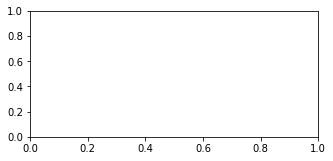

Error in callback <function flush_figures at 0x0000029BFFDE6AF0> (for post_execute):


KeyboardInterrupt: 

In [4]:
plt.figure(1,figsize=(10,10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 1.2,
                          top = 0.9, wspace = 0.5, hspace = 0.5)
plt.subplot(3,2,1)
df_Europe.plot(kind='bar').set_title("Europe")
plt.subplot(3,2,2)
df_Africa.plot(kind='bar').set_title("Africa")
plt.subplot(3,2,3)
df_America.plot(kind='bar').set_title("Amercia")
plt.subplot(3,2,4)
df_Asie.plot(kind='bar').set_title("Asia")
plt.subplot(3,2,5)
df_Oceanie.plot(kind='bar').set_title("Oceanie")
plt.show()


### Short statistics and data visualisation  

In [5]:
merged.describe()

,Year,rain,avg_temp,yield_amound,pesticide_amound
count,5.942202e+06,5.942202e+06,5.942202e+06,5.942202e+06,5.942202e+06
mean,2.001220e+03,1.086768e+03,1.918655e+01,8.085380e+06,1.702729e+04
std,6.795435e+00,6.249681e+02,6.992438e+00,3.616704e+07,4.578163e+04
min,1.990000e+03,1.810000e+01,-3.370000e+00,0.000000e+00,0.000000e+00
25%,1.995000e+03,6.450000e+02,1.432000e+01,2.905000e+04,4.327000e+01
50%,2.001000e+03,1.083000e+03,2.004000e+01,2.623142e+05,9.680000e+02
75%,2.007000e+03,1.414000e+03,2.579000e+01,2.113830e+06,8.775570e+03
max,2.013000e+03,3.240000e+03,3.042000e+01,7.680904e+08,3.677780e+05


In [23]:
data=merged[(merged['Area']=='Ghana')| (merged['Area']=='Namibia')| (merged['Area']=='Mauritania')]

c:\Users\aliss\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\aliss\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\aliss\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


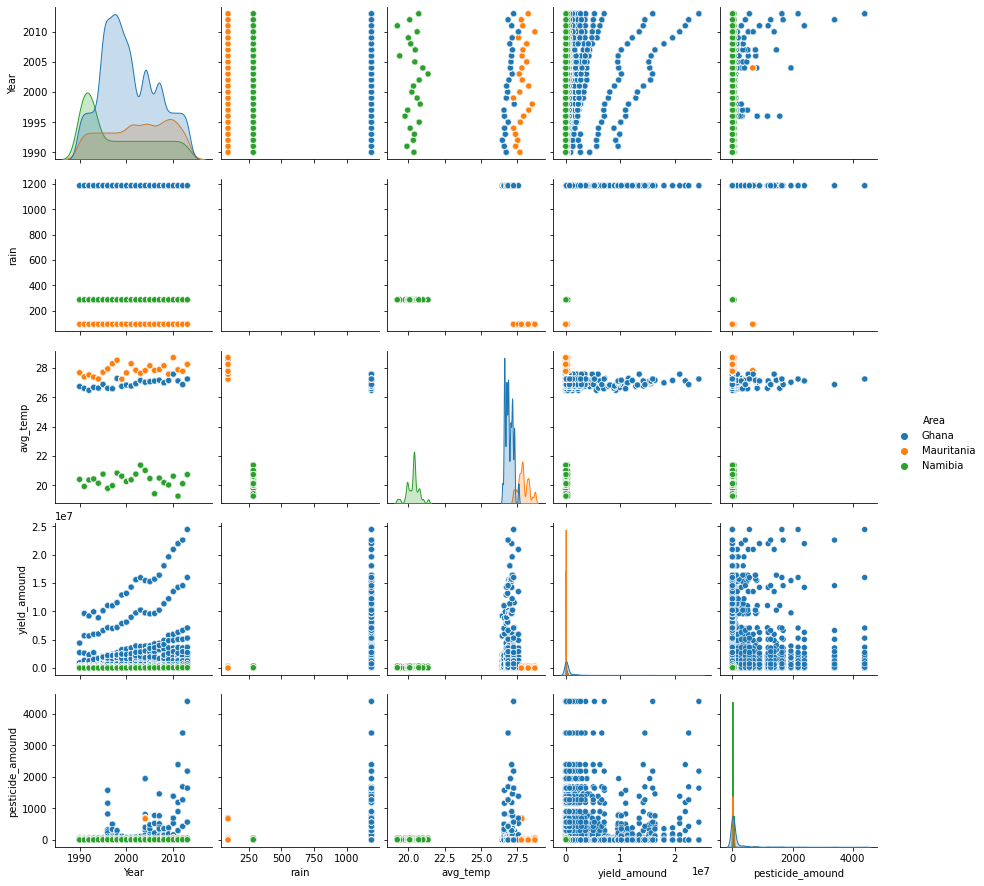

In [24]:
sns.pairplot(data, hue='Area');

In [6]:
A=merged.groupby("Area")[[ "avg_temp", "yield_amound"]].mean()
A

,avg_temp,yield_amound
Area,,
Albania,16.319345,8.235553e+04
Algeria,17.512500,3.774491e+05
Angola,24.269702,3.155262e+05
Argentina,17.755890,2.048710e+06
Australia,16.592083,1.746777e+06
...,...,...
Tunisia,19.516667,1.645500e+05
Uganda,23.766218,7.279063e+05
Uruguay,16.968701,1.985153e+05


<AxesSubplot:xlabel='Area'>

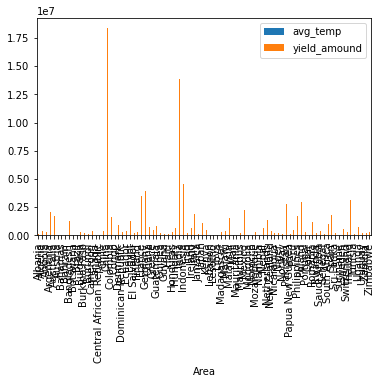

In [7]:
A.plot(kind='bar')

### PCA

I think that to start with you have to analyse the different components and for that you can use a PCA

In [40]:
print('Item_x',len(merged['Item_x'].unique()),merged['Item_x'].unique())

Item_x 205 ['Bananas' 'Beans, dry' 'Beeswax' 'Cashew nuts, in shell' 'Cassava, fresh'
 'Castor oil seeds' 'Cocoa beans' 'Coffee, green'
 'Game meat, fresh, chilled or frozen' 'Groundnuts, excluding shelled'
 'Hen eggs in shell, fresh'
 'Kenaf, and other textile bast fibres, raw or retted' 'Maize (corn)'
 'Meat of cattle with the bone, fresh or chilled'
 'Meat of chickens, fresh or chilled' 'Meat of goat, fresh or chilled'
 'Meat of pig with the bone, fresh or chilled'
 'Meat of sheep, fresh or chilled' 'Millet' 'Natural honey'
 'Oil palm fruit' 'Onions and shallots, green'
 'Other citrus fruit, n.e.c.' 'Other fruits, n.e.c.'
 'Other vegetables, fresh n.e.c.' 'Pineapples' 'Potatoes'
 'Raw hides and skins of cattle' 'Raw hides and skins of goats or kids'
 'Raw hides and skins of sheep or lambs' 'Raw milk of cattle' 'Rice'
 'Seed cotton, unginned' 'Sesame seed' 'Sisal, raw' 'Sugar cane'
 'Sunflower seed' 'Sweet potatoes' 'Tomatoes' 'Unmanufactured tobacco'
 'Wheat' 'Beef and Buffalo Meat,

In [41]:

data=merged[(merged['Item_x']=='Rice')| (merged['Item_x']=='Wheat')| (merged['Item_x']=='Maize')|(merged['Item_x']=='Fruit Primary')]
df = data[[ "avg_temp", "yield_amound","pesticide_amound","rain"]]
df_2= data[[ "Item_x", "avg_temp", "yield_amound","pesticide_amound"]]
df

,avg_temp,yield_amound,pesticide_amound,rain
1045,24.12,3000.0,64.0,1010.0
1046,24.12,3000.0,56.0,1010.0
1047,24.12,3000.0,30.0,1010.0
1048,24.12,3000.0,17.0,1010.0
1049,24.12,3000.0,5.0,1010.0
...,...,...,...,...
15908428,19.76,255797.5,0.0,657.0
15908429,19.76,255797.5,177.7,657.0
15908430,19.76,255797.5,0.0,657.0
15908431,19.76,255797.5,0.0,657.0


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
yield_scaled = StandardScaler().fit_transform(df)
# As a result, we obtained a two-dimensional NumPy array. We can convert it to a pandas DataFrame for a better display.
df_scaled = pd.DataFrame(data=yield_scaled, 
                                columns=df.columns)
df_scaled.head()

,avg_temp,yield_amound,pesticide_amound,rain
0,0.711652,-0.702925,-0.333577,-0.152652
1,0.711652,-0.702925,-0.333776,-0.152652
2,0.711652,-0.702925,-0.334421,-0.152652
3,0.711652,-0.702925,-0.334744,-0.152652
4,0.711652,-0.702925,-0.335042,-0.152652


In [43]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [44]:
pca_yield = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
pca_yield.head(6)

,PC1,PC2
0,-0.763539,-0.106341
1,-0.763636,-0.106437
2,-0.763952,-0.106749
3,-0.764110,-0.106905
4,-0.764255,-0.107049
5,-0.764267,-0.107061


Text(0, 0.5, 'PC2')

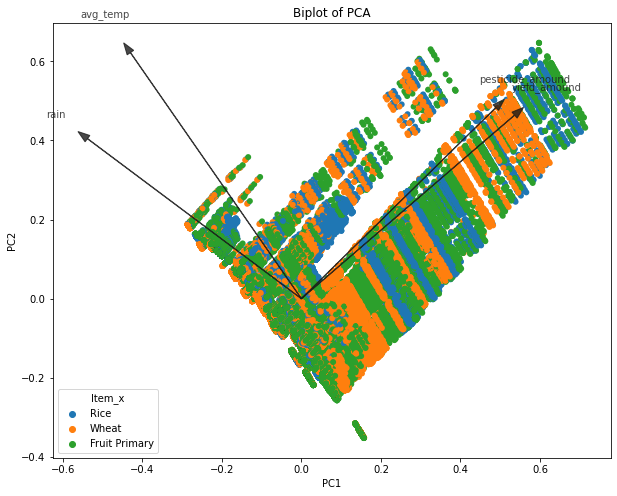

In [45]:
PC1 = pca_yield['PC1']/(pca_yield['PC1'].max() - pca_yield['PC1'].min())
PC2 = pca_yield['PC2']/(pca_yield['PC2'].max() - pca_yield['PC2'].min())

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
              y=PC2,
              hue = df_2['Item_x'].tolist(),
              linewidth=0,
              )

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]* 1.15, 
                 np.transpose(pca.components_)[i,1] * 1.15, 
                 list(df.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Item_x')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))

Carte 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [2]:
m = folium.Map(location = [40, -9],
               zoom_start = 6)
m.save('my_map.html')